# ¿Qué vende un coche?

Eres un analista en Crankshaft List. Cientos de anuncios gratuitos de vehículos se publican en tu sitio web cada día. Necesitas estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.

Tomaremos la información del dataset para poder determinar que factores marcan una relación con el precio de lista de un vehículo: iremos limpiando y manejando los datos para intentar relacionar el precio con parámetros como el millaje, el color, el año de colocación, la transmisión y la condición del vehículo.

## Inicialización

Importaremos _pandas_ para hacer el procesamiento/análisis de datos y _matplotlib_ para ayudarnos en algunos pasos del graficado posterior. Numpy servirá para hacer algunos cálculos numéricos.

In [1]:
# Cargar todas las librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Cargar datos

Cargaremos los datos que vamos a usar en este estudio en el dataframe _df_.


In [2]:
# Carga el archivo de datos en un DataFrame
df = pd.read_csv("/datasets/vehicles_us.csv")


### Explorar datos iniciales

El dataset contiene los siguientes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`
- `paint_color`
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina

Hágamos una pequeña exploración inicial para entender con que nos enfrentamos: primero haremos un _info_ para poder ver como se encuentran las columnas, posteriormente haremos un _sample_, un _head_ y un _tail_ para poder tener un vistazo general.

In [3]:
# imprime la información general/resumida sobre el DataFrame
print("Info")
df.info()

print("Describe")
df.describe()

Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB
Describe


,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [4]:
# imprimir una muestra de datos
print("Sample")
display(
    df.sample(n=10, random_state=5)
)

print("Head")
display(df.head())

print("Tail")
display(df.tail())

Sample


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
5326,14995,2010.0,jeep wrangler unlimited,excellent,6.0,gas,126000.0,manual,SUV,silver,1.0,2018-10-29,8
6449,26900,2014.0,ford mustang gt coupe 2d,good,8.0,gas,15201.0,automatic,coupe,blue,NaN,2019-01-23,23
24633,5790,2011.0,ford fusion,good,6.0,gas,101400.0,automatic,sedan,NaN,NaN,2018-11-05,48
28317,17490,2016.0,ford econoline,good,10.0,gas,122974.0,automatic,truck,yellow,NaN,2018-05-25,35
2672,8900,2005.0,chevrolet suburban,good,NaN,gas,NaN,automatic,SUV,white,NaN,2018-12-23,60
26325,4399,2006.0,honda accord,excellent,4.0,gas,117000.0,automatic,sedan,grey,NaN,2018-08-29,55
15099,24999,2016.0,ford f-150,excellent,8.0,gas,60810.0,automatic,truck,black,1.0,2019-01-07,2
23061,13500,2008.0,chevrolet silverado 1500,excellent,8.0,gas,164399.0,automatic,truck,silver,1.0,2019-03-09,43
48614,2395,2001.0,subaru outback,good,4.0,gas,295000.0,automatic,wagon,NaN,1.0,2018-11-12,22
19547,10875,2016.0,toyota corolla,excellent,4.0,gas,53997.0,automatic,sedan,grey,NaN,2019-04-02,9


Head


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


Tail


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71
51524,6300,2014.0,nissan altima,good,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-06-05,10


Podemos notar que la mayoría de los campos están bien asignados a su tipo, con la excepción de `date_posted` y `is_4wd` los cuales convertiremos a fecha y bool. Por otro lado, no todos los campos tienen el mismo número de valores _NaN_ por lo que debemos de echarles un vistazo después (`model_year`, `cylinders`, `odometers`, `paint_color`, `is_4wd`). La parte que realmente me preocupa es el campo `model`, donde parece que es un campo de entrada libre: esto es un problema porque puede que los usuarios esten introduciendo valores diferentes para el mismo tipo de automóvil, (por ejemplo, escribir ford f-150 y ford 150). 

Por otro lado, hay algo curioso con los mínimos de `price` y `model_year`: son muy bajos, en el caso del primero es 1.0 y del segundo es 1908 (lo cual no está mal, pero suena extraño), tendremos que revisarlos posteriormente.

Aprovéchemos a echar un vistazo de los valores únicos para las columnas que tienen tipo _object_ a excepción de `date_posted` (ya que no parece ser de entrada libre por el formato de fecha que se ve arriba).

In [5]:
for column in ["model", "condition", "fuel", "transmission", "type", "paint_color", "is_4wd"]:
    print(column)
    display(df[column].value_counts())
    print()

model


ford f-150                           2796
chevrolet silverado 1500             2171
ram 1500                             1750
chevrolet silverado                  1271
jeep wrangler                        1119
                                     ... 
ford f-250 super duty                 241
kia sorento                           236
acura tl                              236
nissan murano                         235
mercedes-benz benze sprinter 2500      41
Name: model, Length: 100, dtype: int64


condition


excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64


fuel


gas         47288
diesel       3714
hybrid        409
other         108
electric        6
Name: fuel, dtype: int64


transmission


automatic    46902
manual        2829
other         1794
Name: transmission, dtype: int64


type


SUV            12405
truck          12353
sedan          12154
pickup          6988
coupe           2303
wagon           1541
mini-van        1161
hatchback       1047
van              633
convertible      446
other            256
offroad          214
bus               24
Name: type, dtype: int64


paint_color


white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64


is_4wd


1.0    25572
Name: is_4wd, dtype: int64

Podemos ver que la mayoría de estos valores únicos no se repiten, pero se advierte que los datos de `model` puede que sí: tan solo nótese que se tiene _chevrolet_silverado_ y chevrolet_silverado_1500; un vistazo rápido a la página de wikipedia [[Link 🔗]](https://es.wikipedia.org/wiki/Chevrolet_Silverado#1500-_2500_-_3500) del vehículo indica que Chevrolet Silverado es un **rango de camionetas**, mientrás que 1500 denota el modelo propiamente (en este caso, el modelo de carga para una tonelada). Tenemos que buscar una manera de corregir esos valores con la familia del modelo/marca de la compañía automotriz.


### Conclusiones y siguientes pasos

Recapitulando, tenemos 51525 datos en total, con al cinco columnas que tienen menos valores (caso especial de `is_4wd`, parece que los ausentes son simplemente False ya que 1.0 tiene la pinta de ser True). La columna `model` nos dará problemas pues hay valores que pueden hacer referencia al mismo modelo/familia. Finalmente, reemplazaremos `condition` con un valor númerico para simplificar el proceso.

Como siguientes pasos reemplazaremos los ausentes si es posible, corregiremos los datos de tipo incorrecto y veremos como mejorar la columna `model` antes de ir a estudiar los parámetros.

## Tratar los valores ausentes (si hay)

Tenemos las siguientes columnas con ausentes: `model_year`, `cylinders`, `odometer`, `paint_color`, `is_4wd`. Revisemos si hay alguna relación entre ellos siendo varios valores ausentes en la misma entrada:

In [6]:
# Mostremos los valores en donde existe al menos un valor ausente
df[df.isnull().any(axis=1)]


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


Notemos que 36673 de 51525 rows tienen un valor nulo, aunque viendo la tabla parece que es debido a `is_4wd`: este valor debería ser False. Reemplacemos esos valores primero y volvamos a revisar lo anterior.

### Columna `is_4wd`

Reemplacemos los valores NaN por 0, ya que posteriormente cambiaremos el tipo de columna a bool (1 será True, 0 False):

In [7]:
# Usemos where para reemplazar los valores incorrectos con ceros. De ahora en adelante crearemos una copia
# de df: df_cleaned para poder tener los cambios solo en ésta.
df_cleaned = df.copy()

df_cleaned.is_4wd = df_cleaned.is_4wd.where(
    df_cleaned.is_4wd == 1.0, 0
)


In [8]:
# Mostremos lo que tenemos ahora
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Parece que el cambio se hizó bien (no era realmente muy complicado), con esto ya podemos revisar si existe alguna relación entre los demás ausentes sin que este nos estorbe.

### Relación entre los valores ausentes: nuevas columnas a partir de `model`

Para poder imprimir las filas donde hay más de un valor ausente crearemos una pequeña función que nos ayudara:

In [9]:
# Definamos esta función que se usará con apply para obtener filas con múltiples valores ausentes.

def any_row(row, more_value=2):
    grand_total = 0
    
    for element in row:           
        if grand_total >= more_value:
            return True
        elif element:
            grand_total += 1
        else:
            None
            
    return False

In [10]:
# Mostremos los valores en donde existe al menos un valor ausente y el describe
#df[df.isnull().any(axis=1)]

df_cleaned_multiple_null = df_cleaned[df_cleaned.isnull().apply(any_row, axis=1)]

display(
    df_cleaned_multiple_null.sample(n=10, random_state=2)
)

df_cleaned_multiple_null.info()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
30022,5000,NaN,chevrolet impala,good,6.0,gas,NaN,automatic,sedan,black,0.0,2018-07-19,38
29585,4999,NaN,ford f-150,excellent,6.0,gas,187100.0,automatic,pickup,NaN,0.0,2018-08-27,19
15250,15981,NaN,hyundai elantra,like new,4.0,gas,34549.0,automatic,sedan,NaN,0.0,2019-01-05,7
1369,20000,NaN,ford f-150,excellent,6.0,gas,98000.0,automatic,pickup,NaN,1.0,2018-05-06,25
43901,17990,NaN,jeep wrangler unlimited,excellent,6.0,gas,132000.0,manual,SUV,NaN,1.0,2018-06-13,20
50943,4300,2008.0,toyota prius,good,NaN,hybrid,NaN,automatic,coupe,NaN,0.0,2018-07-15,12
6873,7950,2014.0,ford escape,excellent,4.0,gas,NaN,automatic,SUV,NaN,0.0,2018-07-28,7
7522,2900,2005.0,ford f-150,excellent,8.0,gas,NaN,automatic,pickup,NaN,1.0,2018-07-18,53
35572,6899,NaN,chevrolet cruze,good,4.0,gas,118040.0,automatic,sedan,NaN,0.0,2018-08-22,24
7512,12995,NaN,ford mustang,good,6.0,gas,NaN,automatic,convertible,NaN,0.0,2018-10-08,57


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 3 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         4086 non-null   int64  
 1   model_year    2720 non-null   float64
 2   model         4086 non-null   object 
 3   condition     4086 non-null   object 
 4   cylinders     2216 non-null   float64
 5   fuel          4086 non-null   object 
 6   odometer      1571 non-null   float64
 7   transmission  4086 non-null   object 
 8   type          4086 non-null   object 
 9   paint_color   1322 non-null   object 
 10  is_4wd        4086 non-null   float64
 11  date_posted   4086 non-null   object 
 12  days_listed   4086 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 446.9+ KB


De lo anterior, no se puede apreciar realmente una relación entre los valores ausentes **pero** se puede decir lo siguiente de cada columna: `model_year` muy probablemente sea un valor obligatorio al vender, por lo que el hecho de que falte puede deberse a un problema de guardado de datos; y el resto de valores tal vez no lo sea, lo que indica que el usuario no los incluyó (por ejemplo, `odometer`).

Como vamos a querer utilizar los valores de `models` acomodados para poder imputar más adelante, añadiremos dos columnas que usaremos: `model_manufacturer` que se cargará con la primer palabra (que son los nombres de las compañías) y `model_line` donde guardaremos el resto.

In [11]:
#Agreguemos estas nuevas columnas y mostremos
df_cleaned["model_manufacturer"] = df_cleaned.model.str.split(" ", n=2).str[0]
df_cleaned["model_line"] = df_cleaned.model.str.split(" ", n=2).str[1]

df_cleaned.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_manufacturer,model_line
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,bmw,x5
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,ford,f-150
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,hyundai,sonata
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9,ford,f-150
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,chrysler,200


Esos valores de Ford con el sufijo 'f' dan un poco de ansiedad porque son propensos a errores, echemos un ojo a todos los valores únicos para los `model_line` de cada fabricante y veamos que sucede en general.

In [12]:
#df_cleaned.query("model_line.str.find('350')!=-1 and model_manufacturer=='ford'").model_line.value_counts()

for manufacturer in df_cleaned.model_manufacturer.unique():
    print(manufacturer.upper())
    print(df_cleaned.query("model_manufacturer==@manufacturer").model_line.unique())
    print()
    

BMW
['x5']

FORD
['f-150' 'fusion' 'focus' 'f150' 'mustang' 'f-250' 'f250' 'explorer'
 'f-350' 'edge' 'expedition' 'taurus' 'f350' 'ranger' 'escape' 'econoline']

HYUNDAI
['sonata' 'elantra' 'santa']

CHRYSLER
['200' '300' 'town']

TOYOTA
['camry' 'rav4' 'highlander' 'tacoma' '4runner' 'corolla' 'prius' 'tundra'
 'sienna']

HONDA
['pilot' 'accord' 'cr-v' 'civic' 'odyssey']

KIA
['sorento' 'soul']

CHEVROLET
['silverado' 'traverse' 'tahoe' 'malibu' 'impala' 'corvette' 'equinox'
 'colorado' 'camaro' 'cruze' 'suburban' 'trailblazer']

RAM
['1500' '3500' '2500']

GMC
['yukon' 'sierra' 'acadia']

JEEP
['cherokee' 'wrangler' 'liberty' 'grand']

NISSAN
['altima' 'rogue' 'frontier' 'versa' 'maxima' 'sentra' 'murano']

SUBARU
['outback' 'impreza' 'forester']

DODGE
['charger' 'grand' 'dakota']

MERCEDES-BENZ
['benze']

ACURA
['tl']

CADILLAC
['escalade']

VOLKSWAGEN
['jetta' 'passat']

BUICK
['enclave']



Parece que este problema solo surge en Ford, ya que en Dodge, donde podría haber algo similar (por los 2500, 3500, étc), no sucede. Reemplacemos estos valores para poder tenerlo bien organizado.

In [13]:
# Usemos el amigable replace con un dict bien básico y revisemos de nuevo
df_cleaned.replace(
    {"model_line": {"f-150":"f150", "f-250":"f250", "f-350":"f350"}},
    inplace=True
)

for manufacturer in df_cleaned.model_manufacturer.unique():
    print(manufacturer.upper())
    print(df_cleaned.query("model_manufacturer==@manufacturer").model_line.unique())
    print()

BMW
['x5']

FORD
['f150' 'fusion' 'focus' 'mustang' 'f250' 'explorer' 'f350' 'edge'
 'expedition' 'taurus' 'ranger' 'escape' 'econoline']

HYUNDAI
['sonata' 'elantra' 'santa']

CHRYSLER
['200' '300' 'town']

TOYOTA
['camry' 'rav4' 'highlander' 'tacoma' '4runner' 'corolla' 'prius' 'tundra'
 'sienna']

HONDA
['pilot' 'accord' 'cr-v' 'civic' 'odyssey']

KIA
['sorento' 'soul']

CHEVROLET
['silverado' 'traverse' 'tahoe' 'malibu' 'impala' 'corvette' 'equinox'
 'colorado' 'camaro' 'cruze' 'suburban' 'trailblazer']

RAM
['1500' '3500' '2500']

GMC
['yukon' 'sierra' 'acadia']

JEEP
['cherokee' 'wrangler' 'liberty' 'grand']

NISSAN
['altima' 'rogue' 'frontier' 'versa' 'maxima' 'sentra' 'murano']

SUBARU
['outback' 'impreza' 'forester']

DODGE
['charger' 'grand' 'dakota']

MERCEDES-BENZ
['benze']

ACURA
['tl']

CADILLAC
['escalade']

VOLKSWAGEN
['jetta' 'passat']

BUICK
['enclave']



Todo se ve mejor, estos nuevos valores nos serán muy útiles posteriormente.

### Columna `paint_color`

Echemos un vistazo a lo valores únicos que tenemos en esta columna.

In [14]:
df_cleaned.paint_color.unique()

array([nan, 'white', 'red', 'black', 'blue', 'grey', 'silver', 'custom',
       'orange', 'yellow', 'brown', 'green', 'purple'], dtype=object)

No tenemos manera de poder saber de que color va a ser un automóvil: no existe relación con el tipo de motor o demás (en realidad si la hay, las tendencias indican que los vehículos nuevos suelen ser de colores menos llamativos, pero tomar esos datos y relacionarlos con este dataframe es un trabajo demasiado largo para este proyecto). Por lo tanto, se optará por borrar los valores que tengan nulo este campo. Lamentablemente estos son ~10000 y representan un poco menos de 10%, pero creemos que la precisión será mejor con esto.

In [15]:
# Borremos nulos y veamo la info de nuevo
df_cleaned = df_cleaned.dropna(subset=["paint_color"])

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42258 entries, 1 to 51523
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               42258 non-null  int64  
 1   model_year          39291 non-null  float64
 2   model               42258 non-null  object 
 3   condition           42258 non-null  object 
 4   cylinders           37948 non-null  float64
 5   fuel                42258 non-null  object 
 6   odometer            35821 non-null  float64
 7   transmission        42258 non-null  object 
 8   type                42258 non-null  object 
 9   paint_color         42258 non-null  object 
 10  is_4wd              42258 non-null  float64
 11  date_posted         42258 non-null  object 
 12  days_listed         42258 non-null  int64  
 13  model_manufacturer  42258 non-null  object 
 14  model_line          42258 non-null  object 
dtypes: float64(4), int64(2), object(9)
memory usage: 5.2+

### Columna `model_year`

Nuestra columna `model_year` tiene 392291 datos no nulos. De manera tajante no podriamos saber a que año pertenece un vehículo, pero quizás haya una relación con la marca y el modelo (hay más carros nuevos que viejos, por ejemplo). Veamos el describe primero para ver como se distribuyen los cuartiles.

In [16]:
df_cleaned.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,42258.000000,39291.000000,37948.000000,35821.000000,42258.000000,42258.000000
mean,12124.069265,2009.735461,6.124381,115770.393512,0.495575,39.593781
std,10135.029855,6.293246,1.659557,65374.203694,0.499986,28.230447
min,1.000000,1908.000000,3.000000,0.000000,0.000000,0.000000
25%,4999.000000,2006.000000,4.000000,70100.000000,0.000000,19.000000
50%,9000.000000,2011.000000,6.000000,113096.000000,0.000000,33.000000
75%,16689.000000,2014.000000,8.000000,155072.000000,1.000000,53.000000
max,375000.000000,2019.000000,12.000000,990000.000000,1.000000,267.000000


Es claro que la mayoría de los automoviles son de los 2000's en adelante, ahora lo que haremos será ver como se distribuye `model_year` en relación a `model_line` para los anuncios en que el primero es nulo, usaremos un boxplot para eso.

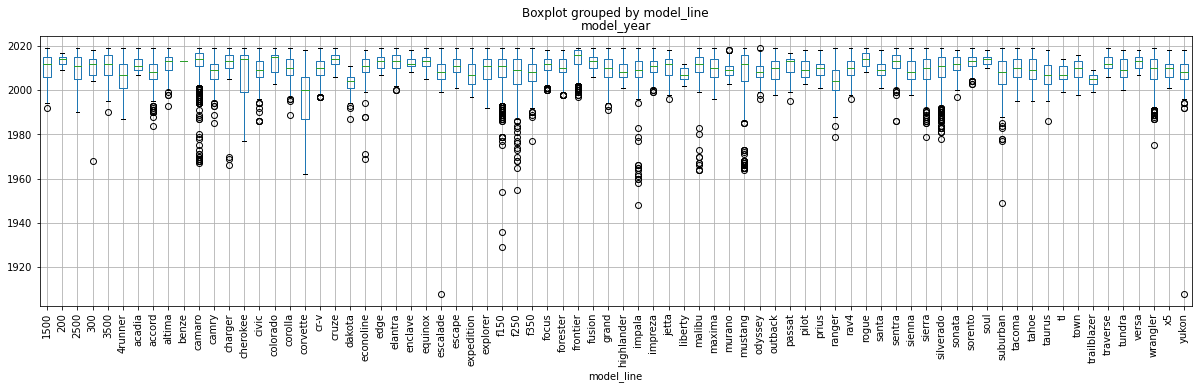

In [17]:
# Hagamos un scatter con las combinaciones de condition y type. Usaremos un subplot para no tener un gráfico
# gigantesco, sino algo más manejable. Definamos un df con los valores en donde model_year es no nulo

df_cleaned_drop_year = df_cleaned.dropna(subset=["model_year"])

unique_missing_model_line_year = df_cleaned[df_cleaned.model_year.isna()].model_line.unique()

df_cleaned_drop_year.query("model_line in @unique_missing_model_line_year").boxplot(
    by = "model_line", column ="model_year", figsize=(20,5), rot=90
)

plt.show()

Podemos notar que el rango intercuartil es bastante estable a lo largo de casi todos los modelos (excepción notable el Corvette), y que los _outliers_ no suelen ser demasiados. Podemos imputar con la mediana de estos valores para rellenar los años faltantes.

Como tenemos un rango muy amplio de valores, crearemos una columna auxiliar `model_range` que nos permitirá imputar mejor cuando creemos una tabla pivote. Usaremos una clasificación más o menos subjetiva, en étapas del diseño de vehículos.

In [18]:
# Hagamos la nueva columna y veamos su value_counts
df_cleaned["model_range"] = pd.cut(
    df_cleaned["model_year"],
    bins=[-np.inf, 1945, 1960, 1980, np.inf],
    labels=["Pre-1945", "Postguerra", "Clasico", "Moderno"],
    include_lowest=True
)

df_cleaned.model_range.value_counts()

Moderno       39124
Clasico         156
Postguerra        7
Pre-1945          4
Name: model_range, dtype: int64

Creemos una tabla pivote para no tener que calcular los valores de nuevo y verifiquemos.

In [19]:
# Crearemos el pivote y recrearemos df_cleaned_drop_year  para contar la columna recién creada. 
# Usaremos solo los valores sin nulos en cylinder e imprimiremos.

df_cleaned_drop_year = df_cleaned.dropna(subset=["model_year"])

pivot_year_imputation = df_cleaned_drop_year.pivot_table(
    index="model_line", values="model_year", aggfunc="median"
)

pivot_year_imputation

,model_year
model_line,
1500,2012.0
200,2014.0
2500,2011.0
300,2012.0
3500,2012.0
...,...
tundra,2009.0
versa,2013.0
wrangler,2010.0


In [20]:
# Veamos que funciona antes y después
df_cleaned_year_sample = df_cleaned[df_cleaned.model_year.isnull()].sample(n=5, random_state=1)

display(
    df_cleaned_year_sample
)

# Usemos un lambda en apply
df_cleaned_year_sample.apply(    
    lambda row: pivot_year_imputation.loc[row["model_line"]]["model_year"] if np.isnan(row["model_year"]) else row["model_year"], axis=1
)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_manufacturer,model_line,model_range
49761,4475,NaN,jeep grand cherokee laredo,excellent,6.0,gas,180000.0,automatic,SUV,blue,1.0,2019-01-01,32,jeep,grand,NaN
35174,14900,NaN,toyota tacoma,like new,6.0,gas,146600.0,automatic,pickup,silver,0.0,2018-09-30,25,toyota,tacoma,NaN
35922,24995,NaN,toyota tacoma,good,6.0,gas,92353.0,automatic,truck,white,0.0,2018-05-12,62,toyota,tacoma,NaN
14851,11000,NaN,chevrolet silverado 1500,excellent,8.0,gas,129800.0,automatic,pickup,white,1.0,2018-07-26,22,chevrolet,silverado,NaN
43459,16997,NaN,ford edge,excellent,4.0,gas,72757.0,automatic,SUV,black,0.0,2019-04-03,32,ford,edge,NaN


49761    2010.0
35174    2010.0
35922    2010.0
14851    2011.0
43459    2013.0
dtype: float64

Apliquemos a nuestro dataframe y veamos la info:

In [21]:
# Pasamos el apply
df_cleaned.model_year = df_cleaned.apply(    
    lambda row: pivot_year_imputation.loc[row["model_line"]]["model_year"] if np.isnan(row["model_year"]) else row["model_year"], axis=1
)

# Recordemos que model_year se creo antes de esto, así que creemos model_range de nuevo para tenerlo en los valores
# recién imputados.

df_cleaned["model_range"] = pd.cut(
    df_cleaned["model_year"],
    bins=[-np.inf, 1945, 1960, 1980, np.inf],
    labels=["Pre-1945", "Postguerra", "Clasico", "Moderno"],
    include_lowest=True
)

df_cleaned.model_range.value_counts()

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42258 entries, 1 to 51523
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   price               42258 non-null  int64   
 1   model_year          42258 non-null  float64 
 2   model               42258 non-null  object  
 3   condition           42258 non-null  object  
 4   cylinders           37948 non-null  float64 
 5   fuel                42258 non-null  object  
 6   odometer            35821 non-null  float64 
 7   transmission        42258 non-null  object  
 8   type                42258 non-null  object  
 9   paint_color         42258 non-null  object  
 10  is_4wd              42258 non-null  float64 
 11  date_posted         42258 non-null  object  
 12  days_listed         42258 non-null  int64   
 13  model_manufacturer  42258 non-null  object  
 14  model_line          42258 non-null  object  
 15  model_range         42258 non-null  

Esto ya se ve mucho mejor, continuemos con las otras columnas.

### Columna `odometer`

Haremos imputación para odometer, lo que haremos será ver si existe alguna relación con `condition` y `model_year`: los carros usados y más viejos deberían de tener más kilometraje. Hagamos un gráfico para observar la relación entre estas tres variables:

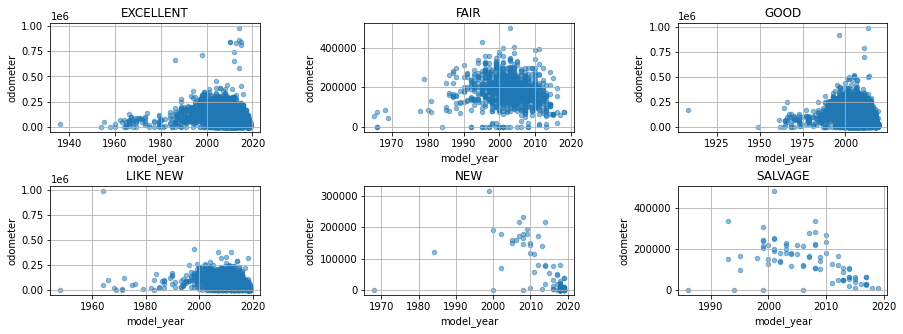

In [22]:
# Hagamos un scatter con las combinaciones de condition y type. Usaremos un subplot para no tener un gráfico
# gigantesco, sino algo más manejable. Definamos un df con los valores en donde odometer es no nulo

df_cleaned_drop_odometer = df_cleaned.dropna(subset=["odometer"])

fig, ax = plt.subplots(
    int(df_cleaned_drop_odometer.condition.unique().shape[0]/3),
    3
)

counter = 0

for condicion, datos in df_cleaned_drop_odometer.groupby("condition"):
    datos.plot(
        x="model_year", y="odometer", ax=ax.flat[counter], title=condicion.upper(), kind="scatter",
        alpha=0.5, grid=True, figsize=(15,5)
    )
    counter += 1

fig.subplots_adjust(hspace=0.5, wspace=0.5)

Cosas extrañas de la vida: los autos con más años no necesariamente tienen más millaje (a excepción de cuando estamos en _new_ o _salvage_). Tampoco hay alguna especie de relación lineal para todas, pero si podemos observar que los datos se agrupan en rangos (e.g. los autos del 2000 estan relativamente cerca), por lo que si queremos imputar un dato para un año en especial (digamos, 2005), podemos tomar un descriptivo para el rango de valores de ese año y condición. Como hay bastantes valores _outliers_, la mediana será una buena opción.

Creemos la tabla pivote.

In [23]:
# Crearemos el pivote para poder simplificar la llamada posterior en la imputación. Usaremos solo los valores sin 
# nulos en Odometer e imprimiremos.
df_cleaned_drop_odometer = df_cleaned.dropna(subset=["odometer"])

pivot_odometer_imputation = df_cleaned_drop_odometer.pivot_table(
    index="model_range", columns="condition", values="odometer", aggfunc="median"
)

pivot_odometer_imputation

condition,excellent,fair,good,like new,new,salvage
model_range,,,,,,
Pre-1945,30000.0,NaN,169328.0,NaN,NaN,NaN
Postguerra,3565.0,NaN,1800.0,4000.0,NaN,NaN
Clasico,54275.0,75437.0,71000.0,47000.0,128.0,NaN
Moderno,104736.0,181613.0,129587.0,73152.5,7500.0,140200.0


Es rápido ver que no tenemos valores para todos los casos posibles (debido al pequeño número de automóviles más viejos), pero nos servirá para poder hacernos una idea de como se distribuyen. Ahora definamos una función imputadora con los valores de la tabla pivote.

In [24]:
# Función imputadora
def imputator_pivot2x2(row, value_to_check, pivot_table, index, column, method, try_column_only=True):
    '''
    Esta función se aplica a cada valor de un dataframe y regresa el valor de una matriz pivote 2x2 (basado en
    index y column) sí el valor original es nulo, en otro caso regresa éste de nuevo. Como habrá
    casos en que no encuentre uno Y el otro, prueba con ellos por sí solos
    '''
    
    # Code logic: getattr para sortear error de llamado al método; default multiple index, elige uno solo si no
    # se encuentran los dos.
    stat = getattr(type(pivot_table), method).__name__
    
    if np.isnan(row[value_to_check]):
        # La columna siempre existe, el índice no necesariamente, hay que  verificar
        try:
            curr_pivot_row = pivot_table.loc[row[index]]
            assert(
                not np.isnan(curr_pivot_row[row[column]])
                #not np.isnan(curr_pivot_row[column])
            )
            return curr_pivot_row[row[column]]# curr_pivot_row[row[column]].stat()
            
        except KeyError:
            if try_column_only: return pivot_table[column].stat()
        except AssertionError:
            if try_column_only: return pivot_table[column].stat()
        else:
            return np.nan
    else:
        return row[value_to_check]
            #try:
                #if preferred == "column":                
                 #   return pivot_table[row[column]].stat()
                #elif preferred == "index":
                #else:
                 #   return pivot_table.loc[row[index]].stat()
            #except:
             #   return np.nan

Hemos creado la función imputadora, ahora nos toca hacer una prueba con un pequeño sample.

In [25]:
# Veamos que funciona antes y después
df_cleaned_odometer_sample = df_cleaned.query("model_range == 'Pre-1945'")#.sample(n=3, random_state=1)

display(
    df_cleaned_odometer_sample
)

df_cleaned_odometer_sample.apply(
    imputator_pivot2x2, value_to_check="odometer", axis=1,
    pivot_table=pivot_odometer_imputation,
    method="mean",
    column="condition",
    index="model_range"
)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_manufacturer,model_line,model_range
33906,12995,1908.0,gmc yukon,good,8.0,gas,169328.0,automatic,SUV,black,0.0,2018-07-06,34,gmc,yukon,Pre-1945
33907,12995,1908.0,cadillac escalade,excellent,8.0,gas,NaN,automatic,SUV,white,0.0,2018-06-24,25,cadillac,escalade,Pre-1945
34713,5000,1936.0,ford f-150,excellent,6.0,gas,30000.0,manual,pickup,purple,0.0,2018-11-22,10,ford,f150,Pre-1945
45694,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,0.0,2018-11-18,59,ford,f150,Pre-1945


33906    169328.0
33907     30000.0
34713     30000.0
45694    169328.0
dtype: float64

Podemos ver que tenemos valores con NaN que se han corregido apropiadamente. Hagamos el reemplazo en la columna original.

In [26]:
# Corramos y reemplacemos, luego veamos que tenemos
df_cleaned.odometer = df_cleaned.apply(
    imputator_pivot2x2, value_to_check="odometer", axis=1,
    pivot_table=pivot_odometer_imputation,
    method="mean",
    column="condition",
    index="model_range",
    try_column_only = False
)

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42258 entries, 1 to 51523
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   price               42258 non-null  int64   
 1   model_year          42258 non-null  float64 
 2   model               42258 non-null  object  
 3   condition           42258 non-null  object  
 4   cylinders           37948 non-null  float64 
 5   fuel                42258 non-null  object  
 6   odometer            42258 non-null  float64 
 7   transmission        42258 non-null  object  
 8   type                42258 non-null  object  
 9   paint_color         42258 non-null  object  
 10  is_4wd              42258 non-null  float64 
 11  date_posted         42258 non-null  object  
 12  days_listed         42258 non-null  int64   
 13  model_manufacturer  42258 non-null  object  
 14  model_line          42258 non-null  object  
 15  model_range         42258 non-null  

Se ve bien todo por acá, podemos continuar con la columna `cylinders`.

### Columna `cylinders`

Ahora podemos continuar con esta información, pero echemosle un vistazo al describe primero súper rápido:

In [27]:
df_cleaned.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,42258.000000,42258.000000,37948.000000,42258.000000,42258.000000,42258.000000
mean,12124.069265,2009.788064,6.124381,115419.131738,0.495575,39.593781
std,10135.029855,6.099292,1.659557,60773.841692,0.499986,28.230447
min,1.000000,1908.000000,3.000000,0.000000,0.000000,0.000000
25%,4999.000000,2007.000000,4.000000,75765.000000,0.000000,19.000000
50%,9000.000000,2011.000000,6.000000,111000.000000,0.000000,33.000000
75%,16689.000000,2014.000000,8.000000,148000.000000,1.000000,53.000000
max,375000.000000,2019.000000,12.000000,990000.000000,1.000000,267.000000


Como podemos notar, no existe demasiada diferencia entre el máximo y el mínimo del cilindraje, lo cual es buena señal (es lo usual). ¿Qué podría determinar el número de cilindro? Probablemente cuestiones mecánicas como el modelo (si son de la misma familia probablemente tengan el mismo número de cilindros), y el tipo de vehículo (es más común ver camionetas con alto cilindraje que sedanes aunque no es excluyente). Para poder ver esto, empecemos creando un gráfico que muestre el número de cilindros y empezando con `type`.

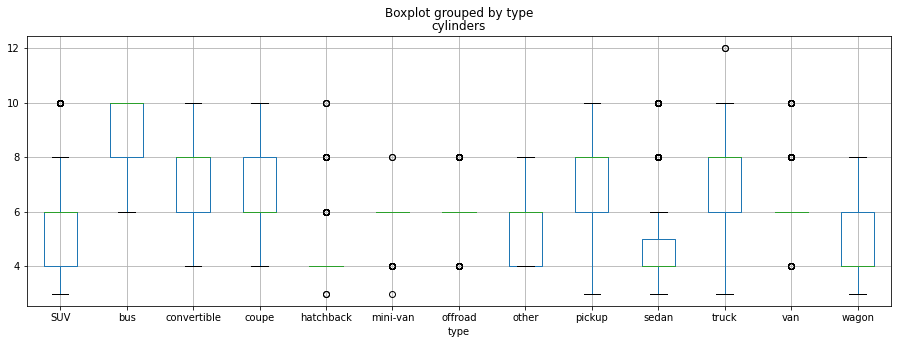

In [28]:
# Creemos una tabla sin valores ausentes
df_cleaned_drop_cylinders = df_cleaned.dropna(subset=["cylinders"])

#fig, ax = plt.subplots(2,1)

df_cleaned_drop_cylinders.boxplot(column="cylinders", by="type", figsize=(15,5))

#df_cleaned_drop_cylinders.boxplot(column="cylinders", by="transmission", figsize=(30,10), ax=ax.flat[1])


plt.show()

Parece que tenemos pocos outliers y que la mayoría de nuestros valores de número de cilindros se agrupan cerca de la mediana como esperabamos. Ahora, echemos un vistazo a nuestros valores ausentes para ver si encontramos `model_line` que reconozcamos previamente.

In [29]:
df_cleaned[df_cleaned.cylinders.isnull()].model_line.unique()

array(['pilot', 'highlander', 'mustang', 'impreza', 'x5', 'sorento',
       'altima', 'frontier', 'camaro', 'silverado', 'civic', 'accord',
       'liberty', '1500', 'prius', 'f150', 'equinox', 'f250', 'focus',
       'soul', 'corolla', 'sierra', '3500', 'charger', '300', 'versa',
       'rogue', 'fusion', 'outback', 'grand', 'passat', 'enclave',
       'explorer', '2500', 'suburban', 'yukon', 'camry', 'f350', 'edge',
       'corvette', 'tacoma', 'rav4', 'jetta', 'traverse', 'town',
       '4runner', 'tundra', 'wrangler', 'sonata', 'elantra', 'forester',
       'odyssey', 'murano', 'escape', 'santa', 'tahoe', 'econoline',
       'trailblazer', 'impala', 'sentra', 'expedition', 'cr-v', 'cruze',
       'colorado', 'malibu', 'taurus', 'cherokee', 'ranger', 'escalade',
       'tl', '200', 'dakota', 'sienna', 'maxima', 'acadia', 'benze'],
      dtype=object)

Note que tenemos cosas conocidas como f150, de los cuales ya conocemos algunos casos que si tienen valores para el número de cilindros. Continuemos haciendo una imputación de la misma manera que hicimos con `odometers`. Primero construiremos una matriz pivote para llamar en la función de imputación y luego aplicaremos.

In [30]:
# Crearemos el pivote para poder simplificar la llamada posterior en la imputación.
df_cleaned_drop_cylinders = df_cleaned.dropna(subset=["cylinders"])

pivot_cylinders_imputation = df_cleaned_drop_cylinders.pivot_table(
    index="model_line", values="cylinders", aggfunc="median"
)

print(
    pivot_cylinders_imputation
)

            cylinders
model_line           
1500              8.0
200               4.0
2500              6.0
300               6.0
3500              6.0
...               ...
tundra            8.0
versa             4.0
wrangler          6.0
x5                6.0
yukon             8.0

[76 rows x 1 columns]


In [31]:
# Veamos que funciona antes y después
df_cleaned_cylinder_sample = df_cleaned[df_cleaned.cylinders.isnull()].sample(n=5, random_state=1)

display(
    df_cleaned_cylinder_sample
)

# Nuestra función de imputación necesita el valor de column, así que haremos este reemplazo con una lambda muy
# sencilla

df_cleaned_cylinder_sample.apply(
    #lambda row: pivot_cylinders_imputation.loc[row["model_line"]][row["cylinders"]] if np.isnan(row["cylinders"]) else row["cylinders"], axis=1
    lambda row: pivot_cylinders_imputation.loc[row["model_line"]]["cylinders"] if np.isnan(row["cylinders"]) else row["cylinders"], axis=1
)

# df_cleaned_cylinder_sample.apply(
#     imputator_pivot2x2, value_to_check="cylinders", axis=1,
#     pivot_table=pivot_cylinders_imputation,
#     method="median",
#     column="cylinders",
#     index="model_line",
#     try_column_only = False
# )

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_manufacturer,model_line,model_range
36856,11995,2010.0,jeep wrangler,good,NaN,gas,102100.0,automatic,SUV,red,1.0,2019-03-05,33,jeep,wrangler,Moderno
17913,1500,2004.0,ford f-150,fair,NaN,gas,132901.0,automatic,truck,brown,1.0,2018-07-22,16,ford,f150,Moderno
1356,35000,2008.0,ram 2500,excellent,NaN,diesel,104736.0,automatic,truck,black,1.0,2018-08-31,32,ram,2500,Moderno
18598,11800,2010.0,ram 1500,good,NaN,gas,183338.0,automatic,truck,grey,1.0,2019-03-24,17,ram,1500,Moderno
19868,5900,2013.0,chevrolet silverado 1500,good,NaN,gas,202000.0,automatic,pickup,white,1.0,2018-09-05,30,chevrolet,silverado,Moderno


36856    6.0
17913    8.0
1356     6.0
18598    8.0
19868    8.0
dtype: float64

Como todo se ve bien, apliquemos al dataset.

In [32]:
# Apliquemos el lambda y echemos un ojo
df_cleaned.cylinders = df_cleaned.apply(
    
    lambda row: pivot_cylinders_imputation.loc[row["model_line"]]["cylinders"] if np.isnan(row["cylinders"]) else row["cylinders"], axis=1
)

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42258 entries, 1 to 51523
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   price               42258 non-null  int64   
 1   model_year          42258 non-null  float64 
 2   model               42258 non-null  object  
 3   condition           42258 non-null  object  
 4   cylinders           42258 non-null  float64 
 5   fuel                42258 non-null  object  
 6   odometer            42258 non-null  float64 
 7   transmission        42258 non-null  object  
 8   type                42258 non-null  object  
 9   paint_color         42258 non-null  object  
 10  is_4wd              42258 non-null  float64 
 11  date_posted         42258 non-null  object  
 12  days_listed         42258 non-null  int64   
 13  model_manufacturer  42258 non-null  object  
 14  model_line          42258 non-null  object  
 15  model_range         42258 non-null  

Todo se ve en órden en `cylinders` y no fue necesario relacionar nada con `type` afortunadamente. Hemos limpiado todos los datos, pero como se aprecia de arriba, es necesario cambiar el tipo de `is_4wd` y `date_posted`.

## Corregir los tipos de datos

Corrijamos bien sencillamente esto, utilicemos el astype de pandas.

In [33]:
# Hagamos las conversiones
df_cleaned.is_4wd = df_cleaned.is_4wd.astype("bool")

df_cleaned.date_posted = pd.to_datetime(df_cleaned.date_posted, format ="%Y-%m-%d")

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42258 entries, 1 to 51523
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   price               42258 non-null  int64         
 1   model_year          42258 non-null  float64       
 2   model               42258 non-null  object        
 3   condition           42258 non-null  object        
 4   cylinders           42258 non-null  float64       
 5   fuel                42258 non-null  object        
 6   odometer            42258 non-null  float64       
 7   transmission        42258 non-null  object        
 8   type                42258 non-null  object        
 9   paint_color         42258 non-null  object        
 10  is_4wd              42258 non-null  bool          
 11  date_posted         42258 non-null  datetime64[ns]
 12  days_listed         42258 non-null  int64         
 13  model_manufacturer  42258 non-null  object    

Todo se ve bien por este lado, solo una cosa más: uno de los `type` de vehículos es _SUV_, lo cual esta completamente en mayúsculas, cambiemoslo a minúsculas para tener la misma estructura en todos los valores de la columna.

In [34]:
# Cambiemos los cases y mostremos.
df_cleaned.type = df_cleaned.type.str.lower()

df_cleaned.type.unique()

array(['pickup', 'sedan', 'suv', 'truck', 'coupe', 'van', 'convertible',
       'hatchback', 'wagon', 'mini-van', 'other', 'bus', 'offroad'],
      dtype=object)

Todo se ve en órden, podemos proseguir.

## Enriquecer datos

Para poder continuar, enriqueceremos un poco los datos haciendo unos cálculos relativamente simples: día de la semana, mes y año; los años del vehículo cuando fue publicado, y la media del millaje por año. También agregaremos una columna donde condition esté representado por un valor numérico, en vez de un string.


In [35]:
# Agrega valores de día, mes y año para cuando se colocó el anuncio

df_cleaned["date_posted_day"] = df_cleaned.date_posted.dt.day
df_cleaned["date_posted_month"] = df_cleaned.date_posted.dt.month
df_cleaned["date_posted_year"] = df_cleaned.date_posted.dt.year


In [36]:
# Agrega los años del vehículo cuando el anuncio se colocó

df_cleaned["years_old"] = df_cleaned.date_posted_year - df_cleaned.model_year

In [37]:
# Agrega el millaje promedio del vehículo por año evitando dividir entre cero

df_cleaned["odometer_per_year"] = np.where(
    df_cleaned.years_old != 0,
    df_cleaned.odometer/df_cleaned.years_old,
    df_cleaned.odometer
)


In [38]:
# Crearemos una columna adicional donde tendremos la condición pero como un valor entero en vez del string actual
# Como es algo feo escribirlo, la separaremos y usaremos un np.when (la versión de Python en
# este notebook no tiene todavía match-case)

# creemos condiciones
conditions = [
    df_cleaned["condition"] == "new",
    df_cleaned["condition"] == "like new",
    df_cleaned["condition"] == "excellent",
    df_cleaned["condition"] == "good",
    df_cleaned["condition"] == "fair",
    df_cleaned["condition"] == "salvage",
]

# valores de retorno
values = [5,4,3,2,1,0]

# usemos np.select
df_cleaned["condition_numeric"] = np.select(conditions, values)
                                        

## Comprobar datos limpios

Ya hemos hecho la limpieza y extensión de los datos, hagamos un vistazo general para ver que tenemos. Usemos info, describe y un sample.

In [39]:
# imprime la información general/resumida sobre el DataFrame

df_cleaned.info()

df_cleaned.describe()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 42258 entries, 1 to 51523
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   price               42258 non-null  int64         
 1   model_year          42258 non-null  float64       
 2   model               42258 non-null  object        
 3   condition           42258 non-null  object        
 4   cylinders           42258 non-null  float64       
 5   fuel                42258 non-null  object        
 6   odometer            42258 non-null  float64       
 7   transmission        42258 non-null  object        
 8   type                42258 non-null  object        
 9   paint_color         42258 non-null  object        
 10  is_4wd              42258 non-null  bool          
 11  date_posted         42258 non-null  datetime64[ns]
 12  days_listed         42258 non-null  int64         
 13  model_manufacturer  42258 non-null  object    

,price,model_year,cylinders,odometer,days_listed,date_posted_day,date_posted_month,date_posted_year,years_old,odometer_per_year,condition_numeric
count,42258.000000,42258.000000,42258.000000,42258.000000,42258.000000,42258.000000,42258.000000,42258.000000,42258.000000,42258.000000,42258.000000
mean,12124.069265,2009.788064,6.122935,115419.131738,39.593781,15.431705,6.624947,2018.308604,8.520540,18895.086198,2.638270
std,10135.029855,6.099292,1.658281,60773.841692,28.230447,8.741254,3.474629,0.461923,6.112877,16156.234648,0.712476
min,1.000000,1908.000000,3.000000,0.000000,0.000000,1.000000,1.000000,2018.000000,0.000000,0.000000,0.000000
25%,4999.000000,2007.000000,4.000000,75765.000000,19.000000,8.000000,3.000000,2018.000000,4.000000,10472.950000,2.000000
50%,9000.000000,2011.000000,6.000000,111000.000000,33.000000,15.000000,7.000000,2018.000000,8.000000,14983.791667,3.000000
75%,16689.000000,2014.000000,8.000000,148000.000000,53.000000,23.000000,10.000000,2019.000000,12.000000,21714.285714,3.000000
max,375000.000000,2019.000000,12.000000,990000.000000,267.000000,31.000000,12.000000,2019.000000,110.000000,320000.000000,5.000000


In [40]:
# imprimir una muestra de datos

df_cleaned.sample(n=5, random_state=4)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,days_listed,model_manufacturer,model_line,model_range,date_posted_day,date_posted_month,date_posted_year,years_old,odometer_per_year,condition_numeric
39465,13500,2018.0,toyota corolla,excellent,4.0,gas,46914.0,automatic,sedan,white,...,39,toyota,corolla,Moderno,8,6,2018,0.0,46914.00,3
26059,25499,2007.0,ram 2500,like new,6.0,diesel,108900.0,automatic,truck,silver,...,47,ram,2500,Moderno,16,7,2018,11.0,9900.00,4
19436,5995,2010.0,chevrolet equinox,excellent,4.0,gas,142000.0,automatic,sedan,blue,...,13,chevrolet,equinox,Moderno,23,8,2018,8.0,17750.00,3
50137,10990,2010.0,gmc sierra 1500,good,8.0,gas,98300.0,automatic,pickup,white,...,32,gmc,sierra,Moderno,29,10,2018,8.0,12287.50,2
6727,13499,2014.0,jeep grand cherokee,excellent,6.0,gas,126637.0,automatic,suv,black,...,34,jeep,grand,Moderno,22,11,2018,4.0,31659.25,3


Nuestros datos se ven bien, a excepción de unos cuantos posibles valores atípicos que podrían modificar nuestra distribución para su estudio (como el odometro en cero o muy alto), los trataremos después, primero checaremos los parámetros que nos importan más.

## Estudiar parámetros principales

[Elige un enfoque apropiado para estudiar los parámetros enumerados a continuación, presta especial atención a cómo los valores atípicos afectan la forma y la legibilidad de los histogramas.]

Los parámetros son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

Primero mostremos los histogramas de los tres primeros porque tienen el rango más grande de valores.

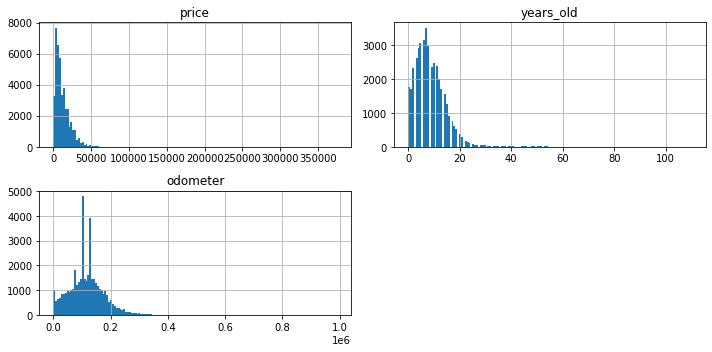

In [41]:
# Creemos los histogramas que necesitamos para nuestras variables a explorar

df_cleaned.loc[:, ["price", "years_old", "odometer"]].hist(
    bins=150, figsize=(10,5)
)

plt.tight_layout()

Note que podemos ver algunos picos en la manera que se distribuyen estas variables, es muy claro en odometer, por lo que sí o si tendremos que suavizar eliminando algunos valores.

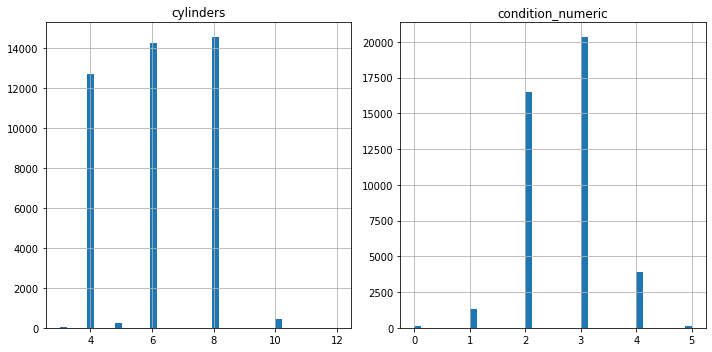

In [42]:
# Ahora las variables con un rango menor
df_cleaned.loc[:, ["cylinders", "condition_numeric"]].hist(
    bins=40, figsize=(10,5)
)

plt.tight_layout()


Aquí no se notan esos picos de manera tan notoria, pero es claro que hay valores que son muy poco representados y nos modificarán mucho los cálculos después.

## Estudiar y tratar valores atípicos

Para poder trabajar con los valores atípicos hagamos un boxplot para cada uno de nuestros parámetros principales.

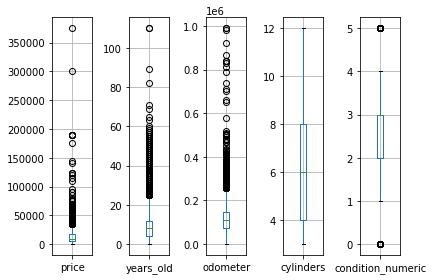

In [43]:
fig, ax = plt.subplots(1,5)

counter = 0

for field in ["price", "years_old", "odometer", "cylinders", "condition_numeric"]:
    df_cleaned.boxplot(column=field, figsize=(10,10), ax=ax.flat[counter])
    counter += 1

plt.tight_layout()

#fig.subplots_adjust(hspace=0.5, wspace=0.5)

Podemos ver que hay muchos valores atípicos en nuestros párametros principales, por lo que sería útil discriminar a los que se encuentran solo adentro del rango intercuartil.

In [44]:
# Almacena los datos sin valores atípicos en un DataFrame separado
# Limitemos los valores con ayuda de la fórmula del rango intercuartil, no operemos sobre cylinders ya que no hay
# valores atípicos.

df_cleaned_typical = df_cleaned.query(
    "5*price.quantile(0.25)/2-3*price.quantile(0.75)/2 <price< 5*price.quantile(0.75)/2-3*price.quantile(0.25)/2 \
    and \
    5*years_old.quantile(0.25)/2-3*years_old.quantile(0.75)/2 <years_old< 5*years_old.quantile(0.75)/2-3*years_old.quantile(0.25)/2 \
    and \
    5*odometer.quantile(0.25)/2-3*odometer.quantile(0.75)/2 <odometer< 5*odometer.quantile(0.75)/2-3*odometer.quantile(0.25)/2 \
    and \
    5*condition_numeric.quantile(0.25)/2-3*condition_numeric.quantile(0.75)/2 <condition_numeric< 5*condition_numeric.quantile(0.75)/2-3*condition_numeric.quantile(0.25)/2"
)

df_cleaned_typical.describe()

,price,model_year,cylinders,odometer,days_listed,date_posted_day,date_posted_month,date_posted_year,years_old,odometer_per_year,condition_numeric
count,39265.000000,39265.000000,39265.000000,39265.000000,39265.000000,39265.000000,39265.000000,39265.000000,39265.000000,39265.000000,39265.000000
mean,11213.561136,2010.117305,6.053177,113960.578034,39.598115,15.436929,6.630944,2018.307628,8.190322,18704.693073,2.638941
std,7779.803050,4.944284,1.657982,52965.685941,28.267563,8.747651,3.472257,0.461517,4.958124,15314.552604,0.679449
min,1.000000,1995.000000,3.000000,0.000000,0.000000,1.000000,1.000000,2018.000000,0.000000,0.000000,1.000000
25%,5000.000000,2007.000000,4.000000,79000.000000,19.000000,8.000000,3.000000,2018.000000,4.000000,10557.888889,2.000000
50%,8995.000000,2011.000000,6.000000,112000.000000,33.000000,15.000000,7.000000,2018.000000,8.000000,14962.285714,3.000000
75%,15988.000000,2014.000000,8.000000,146269.000000,53.000000,23.000000,10.000000,2019.000000,11.000000,21597.833333,3.000000
max,34200.000000,2019.000000,12.000000,256310.000000,267.000000,31.000000,12.000000,2019.000000,23.000000,164409.000000,4.000000


Ya se ve un poco mejor nuestro dataframe, podemos continuar con el procesado de nuestros valores.

## Estudiar parámetros principales sin valores atípicos

Repitamos los histogramas que hicimos previamente, pero ahora sin los valores atípicos que nos daban cosas extrañas.

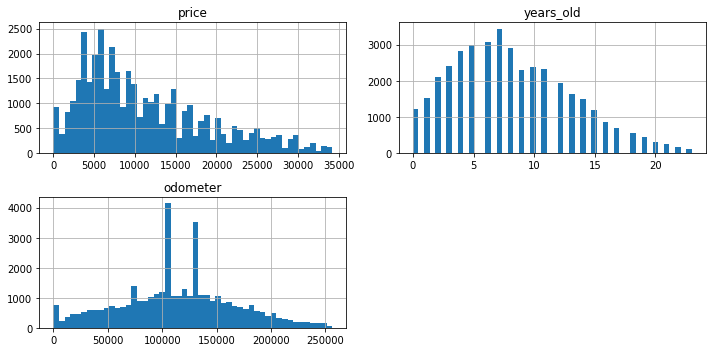

In [45]:
# Creemos los histogramas que necesitamos para nuestras variables a explorar

df_cleaned_typical.loc[:, ["price", "years_old", "odometer"]].hist(
    bins=50, figsize=(10,5)
)

plt.tight_layout()

De aquí podemos ver que se ha suavizado bastante, aunque todavía quedan algunos valores un poco inusuales como el precio tan bajo. No los quitaremos ya que ya hemos limpiado bastante y no deberían impactar mucho. Ahora veamos que sucede con cylinder y condition.

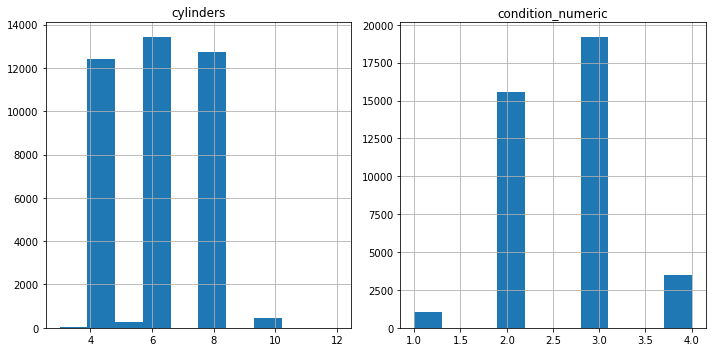

In [46]:
# Ahora las variables con un rango menor
df_cleaned_typical.loc[:, ["cylinders", "condition_numeric"]].hist(
    bins=10, figsize=(10,5)
)

plt.tight_layout()


Se ve mucho mejor, aunque realmente solo eliminamos los vehículos `salvaged`. Podemos continuar.

## Periodo de colocación de los anuncios

Vamos a ver que sucede con `days_listed`, empecemos con un boxplot y un histograma:

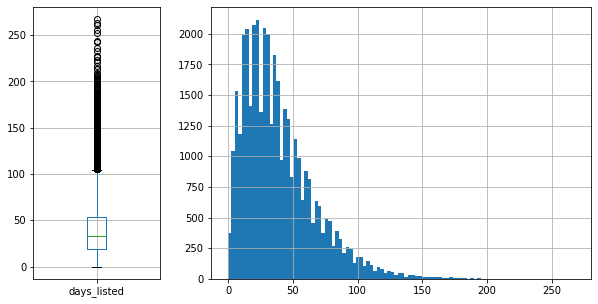

La media es: 39.598115369922326, la mediana es: 33.0
Los cuartiles son
 0.25    19.0
0.50    33.0
0.75    53.0
Name: days_listed, dtype: float64


In [47]:
# Calculemos el boxplot para days_listed

fig, ax = plt.subplots(1,2, figsize=(10, 5), gridspec_kw={'width_ratios': [1, 3]})


df_cleaned_typical.boxplot(column="days_listed", ax=ax.flat[0])
df_cleaned_typical.days_listed.hist(bins=100, ax=ax.flat[1])

plt.show()

print(
    f"La media es: {df_cleaned_typical.days_listed.mean()}, la mediana es: {df_cleaned_typical.days_listed.median()}"
)

print("Los cuartiles son\n", df_cleaned_typical.days_listed.quantile([0.25,0.5,0.75]))

El 50% de los anuncios duran hasta un poco más de un mes en el sitio. Analicemos que sucede con los que estan antes y después del rango intercuartil (los outliers y los que no).

In [48]:
# Hagamos dos nuevos df, uno para outliers y el otro para no. También agreguemos una columna bool para poder
# correlacionar.

df_cleaned_days_listed_typical = df_cleaned_typical.query(
    "days_listed <= 5*days_listed.quantile(0.75)/2-3*days_listed.quantile(0.25)/2"
)

df_cleaned_days_listed_atypical = df_cleaned_typical.query(
    "days_listed > 5*days_listed.quantile(0.75)/2-3*days_listed.quantile(0.25)/2"
)

#df_cleaned_typical["days_listed_typical"] = df_cleaned_typical.index.isin(df_cleaned_days_listed_typical.index)

print(
    f"Los valores no atípicos llegan hasta {df_cleaned_days_listed_typical.days_listed.max()} días. \
Tenemos {df_cleaned_days_listed_typical.shape[0]} típicos y {df_cleaned_days_listed_atypical.shape[0]} atípicos"
)

Los valores no atípicos llegan hasta 104 días. Tenemos 38019 típicos y 1246 atípicos


Con todo lo anterior podemos decir que los valores que se eliminan rápidamente estan hasta el primer cuartil, 19 días; los que tardan demasiado son desde los que estan más alla del tercer cuartil, 53 días. Los que tardan más, arriba de los 104 días son casos muy especiales.

## Precio promedio por cada tipo de vehículo

Creemos un gráfico que nos muestre la cantidad de anuncios por tipo de vehículo y una tabla pivote con los descriptivos usuales de media y mediana.

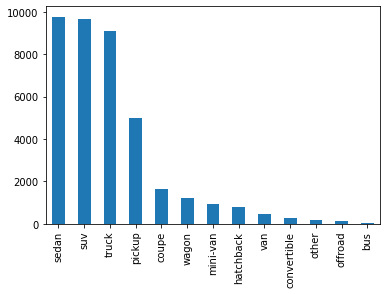

,mean,median
,price,price
type,,
bus,19663.470588,28990.0
convertible,12704.361011,12752.0
coupe,13362.368613,12500.0
hatchback,6799.624372,5962.5
mini-van,7965.939362,6495.0
offroad,14413.695946,12500.0
other,10499.500000,8995.0
pickup,15067.301496,14000.0


In [49]:
# Usemos una gráfica de barras del value_counts
df_cleaned_typical.type.value_counts().plot(kind="bar")

plt.show()

df_cleaned_typical.pivot_table(index="type", values="price", aggfunc=["mean", "median"])

Es claro que los Sedanes y SUVs son los vehículos más abundantes, siendo casi de diez mil anuncios cada uno.

## Factores de precio

Nos enfocaremos en cinco factores posibles de precio: edad, millaje, condición, tipo de transmisión y color. Para las primeras tres, crearemos una matriz de correlación y una matriz de dispersión.

Sedan


,price,years_old,odometer,condition_numeric
price,1.000000,-0.620354,-0.522311,0.291127
years_old,-0.620354,1.000000,0.540067,-0.292674
odometer,-0.522311,0.540067,1.000000,-0.362667
condition_numeric,0.291127,-0.292674,-0.362667,1.000000


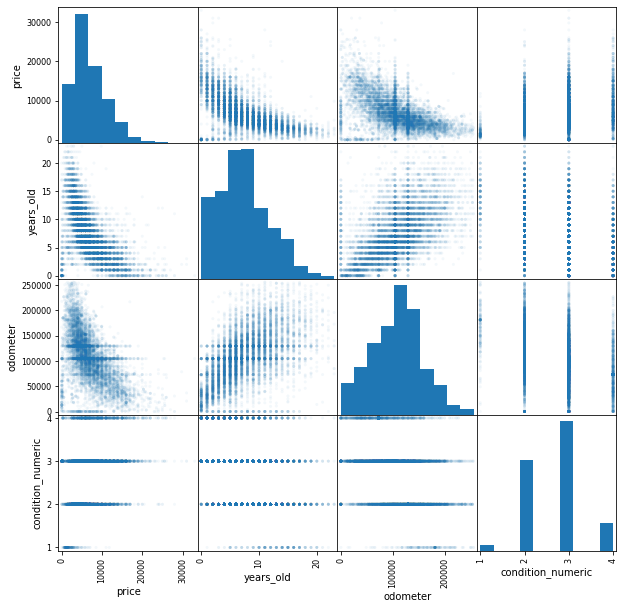

SUV


,price,years_old,odometer,condition_numeric
price,1.000000,-0.580657,-0.481679,0.253416
years_old,-0.580657,1.000000,0.553818,-0.301604
odometer,-0.481679,0.553818,1.000000,-0.339943
condition_numeric,0.253416,-0.301604,-0.339943,1.000000


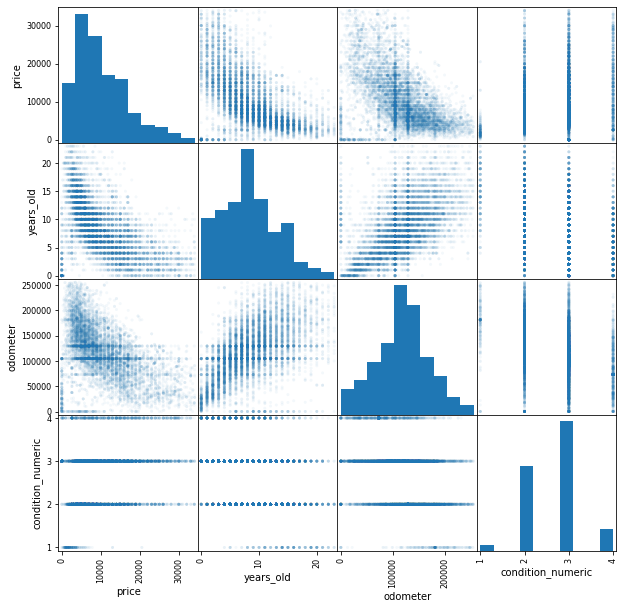

In [50]:
# Elijamos solo sedanes y SUVs
df_cleaned_typical_sedan = df_cleaned_typical.query("type =='sedan'")
df_cleaned_typical_suv = df_cleaned_typical.query("type =='suv'")

# Para sedanes
print("Sedan")
display(
    df_cleaned_typical_sedan.loc[:, ["price", "years_old","odometer", "condition_numeric"]].corr()
)
                       
pd.plotting.scatter_matrix(
    df_cleaned_typical_sedan.loc[:, ["price","years_old","odometer", "condition_numeric"]],
    alpha=0.05, grid=True, figsize=(10,10)
)

plt.show()

# SUVs
print("SUV")
display(
    df_cleaned_typical_suv.loc[:, ["price", "years_old","odometer", "condition_numeric"]].corr()
)
                       
pd.plotting.scatter_matrix(
    df_cleaned_typical_suv.loc[:, ["price","years_old","odometer", "condition_numeric"]],
    alpha=0.05, grid=True, figsize=(10,10)
)

plt.show()

Podemos ver de la primer fila de ambas que existen relaciones importantes entre el precio y el número de años (los autos nuevos son más caros en lo general), el precio y el millaje (entre menos recorridos, mejor), y una correlación débil con la condición y el precio. Las primeras dos son bastante entendibles, pero la tercera es un poco inusual, uno esperaría que los carros en mejor estado tuvieran mucho mejor precio: si es cierto que el precio es más alto, pero realmente no es un factor determinante.

Procedamos con las valores categóricas, `transmission` y `color`. Primero hagamos un value_counts de ambos para saber si existen categorías que dejar de considerar al tener pocos elementos.

In [51]:
print("Transmission Sedan")
display(
    df_cleaned_typical_sedan.transmission.value_counts()
)

print("Paint Color Sedan")
display(
    df_cleaned_typical_sedan.paint_color.value_counts()
)

Transmission Sedan


automatic    9198
manual        462
other         110
Name: transmission, dtype: int64

Paint Color Sedan


silver    2018
black     1747
grey      1601
white     1471
blue      1212
red        926
custom     291
brown      250
green      201
purple      23
yellow      21
orange       9
Name: paint_color, dtype: int64

Parece que casi todas las categorías tiene más 50 elementos, pero desecharemos las tres que no lo son.

In [52]:
# Desechemos y mostremos
df_cleaned_typical_sedan = df_cleaned_typical_sedan.query("paint_color not in ['yellow', 'orange', 'purple']")

df_cleaned_typical_sedan.paint_color.unique()

array(['red', 'black', 'white', 'grey', 'silver', 'custom', 'blue',
       'green', 'brown'], dtype=object)

Todo en órden. Ahora veamos que pasa con los SUV's.

In [53]:
print("Transmission SUV")
display(
    df_cleaned_typical_suv.transmission.value_counts()
)

print("Paint Color SUV")
display(
    df_cleaned_typical_suv.paint_color.value_counts()
)

Transmission SUV


automatic    9181
manual        366
other         131
Name: transmission, dtype: int64

Paint Color SUV


black     2071
white     1854
silver    1523
grey      1143
blue      1007
red        865
green      406
brown      350
custom     295
orange      81
yellow      45
purple      38
Name: paint_color, dtype: int64

Removamos los colores que son menores a 50.

In [54]:
# Desechemos y mostremos
df_cleaned_typical_suv = df_cleaned_typical_suv.query("paint_color not in ['yellow', 'orange', 'purple']")

df_cleaned_typical_suv.paint_color.unique()

array(['black', 'blue', 'red', 'white', 'silver', 'grey', 'green',
       'brown', 'custom'], dtype=object)

Ahora, para poder continuar, hagamos los boxplots de ambos

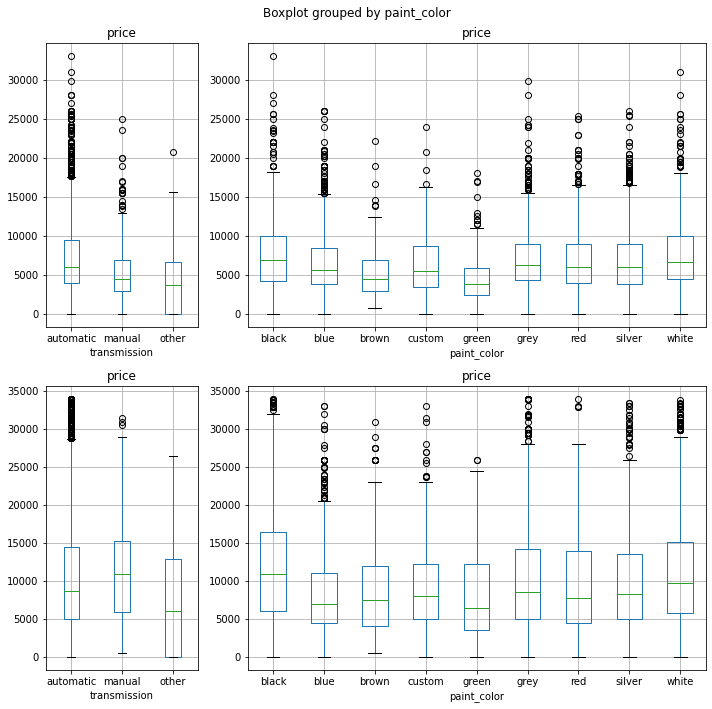

In [55]:
# Hagamos los boxplots

fig, ax = plt.subplots(2,2,figsize=(10,10), gridspec_kw={'width_ratios': [1, 3]})
df_cleaned_typical_sedan.boxplot(
    column="price", by="transmission", ax=ax.flat[0]
)

df_cleaned_typical_sedan.boxplot(
    column="price", by="paint_color", ax=ax.flat[1]
)

df_cleaned_typical_suv.boxplot(
    column="price", by="transmission", ax=ax.flat[2]
)

df_cleaned_typical_suv.boxplot(
    column="price", by="paint_color", ax=ax.flat[3]
)

#ax.flat[0].set_title("")
#plt.text(0, 0, , transform=fig.transFigure, horizontalalignment='center')
plt.tight_layout()

plt.show()

Podemos resumir de los boxplots que para los sedanes el tener transmisión automática es un claro marcador de mayor precio, mientrás que en SUV es el caso con transmisión manual (en las camionetas es mejor tener transmisión manual porque es menos delicada a largo plazo).

En el caso del color del vehículo para sedanes, casi todos son muy similares (a excepción del verde), pero blanco, negro y plata  son los que albergan el mayor precio. Para los SUVs, el caso es distinto, pues el negro y el blanco son claro indicador de un mayor precio (se nos vienen a la mente las camionetas diplomáticas o de compañías de electricidad/agua).

## Conclusión general

[Enumera tus conclusiones importantes en esta sección final, asegúrate de que incluyan aquellas que te llevaron a la forma en que procesaste y analizaste los datos. Habla de los valores ausentes, duplicados, valores atípicos y las posibles razones y soluciones para los artefactos problemáticos que tuviste que abordar. No olvides eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

Hemos hecho todo el proceso de limpieza y exploración de los datos, eliminamos valores ausentes de la columna `paint_color` (ya que no teníamos como imputarla) e hicimos imputación de todos los demás valores. No podemos hablar de duplicados aquí porque no tenemos un id único para cada entrada (puede que dos anuncios sean iguales en su valores pero solo sean dos carros diferentes similares), por lo que no se removió nada de ese estilo.

Un punto importante en el que nos enfocamos fue en los valores atípicos, porque nos distorsionaban demasiado nuestros valores: los eliminamos tomando la definición del rango intercuartil y quedando solo con los que están en ese rango. Después de haber pasado todo el _wrangling_ obligado analizamos los datos con ayuda de matrices de correlación y gráficas (principalmente histogramas y boxplots).

Podemos concluir que las variables más importantes para el precio de un vehículo son el año y el millaje: cosas que a cualquiera que hay comprado un carro le resultaran auto evidentes, sin embargo, lo que no lo era tanto es que la condición no es el párametro con más peso.

Por otro lado, la transmisión puedem influir en el precio ya que se desea un sistema automático en sedanes y manual en SUVs. Por el lado del color, se refuerza la observación de que la mayoría de los carros hoy en día son blancos, plateados o negros.